In [28]:
# all the libaries that we might possibly need

!pip install shap -q


import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score, train_test_split


from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import PolynomialFeatures
import numpy as np

from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import ExtraTreesRegressor
import joblib
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import matplotlib as mpl
import scipy.stats as stats
import plotly.graph_objects as go
import plotly.express as px
from scipy.stats import spearmanr
from scipy.cluster import hierarchy
from scipy.spatial.distance import squareform

from sklearn.model_selection import TimeSeriesSplit
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

# Import filters to remove unnecessary warnings
from warnings import simplefilter
import warnings
warnings.filterwarnings("ignore")
from sklearn.exceptions import ConvergenceWarning

from scipy.cluster import hierarchy
from scipy.spatial.distance import squareform

# Import filters to remove unnecessary warnings
from warnings import simplefilter
import warnings
warnings.filterwarnings("ignore")

from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error, r2_score, mean_absolute_error
import shap


In [14]:
# Read the Excel file
df = pd.read_excel('Dataset _2_CLC.xlsx')

# print the type of data each column is
for column in df.columns:
  print(f"Data type: {df[column].dtype}")

Data type: object
Data type: object
Data type: object
Data type: object
Data type: object
Data type: object
Data type: object
Data type: object
Data type: object
Data type: object
Data type: object
Data type: object
Data type: object
Data type: object
Data type: object


In [15]:
# print the first few rows of the dataset
print(df.head())

  Input Variables  Unnamed: 1 Unnamed: 2 Unnamed: 3 Unnamed: 4 Unnamed: 5  \
0            C (%)      H (%)      N (%)      O (%)      S (%)     VM (%)   
1        53.041259   6.390897   0.871969  39.366227   0.329647  82.070081   
2        53.041259   6.390897   0.871969  39.366227   0.329647  82.070081   
3        53.041259   6.390897   0.871969  39.366227   0.329647  82.070081   
4        53.041259   6.390897   0.871969  39.366227   0.329647  82.070081   

  Unnamed: 6 Unnamed: 7    Unnamed: 8 Unnamed: 9 Unnamed: 10 Unnamed: 11  \
0    Ash (%)     FC (%)  Moisture (%)     T (°C)      OC (%)         SBR   
1   4.884097  13.045822             0        500          60         0.5   
2   4.884097  13.045822             0        600          50           1   
3   4.884097  13.045822             0        800          30           2   
4   4.884097  13.045822             0        900          20         2.5   

  Output variables        Unnamed: 13 Unnamed: 14  
0        H2 (wt.%)  Char yie

In [16]:
# change the data type to be numerical
df = df.apply(pd.to_numeric, errors='coerce')

# print the type of data each column is
for column in df.columns:
  print(f"Data type: {df[column].dtype}")

Data type: float64
Data type: float64
Data type: float64
Data type: float64
Data type: float64
Data type: float64
Data type: float64
Data type: float64
Data type: float64
Data type: float64
Data type: float64
Data type: float64
Data type: float64
Data type: float64
Data type: float64


In [17]:
# Check for duplicate rows
duplicates = df.duplicated()
duplicate_rows = df[duplicates]

# Print summary information
print(f"Total number of duplicate rows: {len(duplicate_rows)}")

if len(duplicate_rows) > 0:
    print("\nHere are the duplicate rows:")
    print(duplicate_rows)

    # Get indices of duplicate rows
    print("\nIndices of duplicate rows:")
    print(df[duplicates].index.tolist())

    # To see which rows are duplicates of each other
    print("\nAll rows that have duplicates (including first occurrence):")
    all_duplicates = df[df.duplicated(keep=False)]
    print(all_duplicates.sort_values(by=list(df.columns)))
else:
    print("\nNo duplicate rows found in the dataset.")

# Optional: Count of duplicates for each duplicated row
if len(duplicate_rows) > 0:
    print("\nCount of occurrences for each duplicated row:")
    duplicate_counts = df.groupby(list(df.columns)).size()
    print(duplicate_counts[duplicate_counts > 1])

Total number of duplicate rows: 0

No duplicate rows found in the dataset.


In [20]:
# Read the Excel file
df = pd.read_excel('processed_data.xlsx')

# Check for missing values
print("Missing values count:")
print(df.isnull().sum())

# Options for handling missing values:
# a. Remove rows with missing values
df_cleaned = df.dropna()
df_cleaned = df_cleaned.drop('Moisture (%)', axis=1)

# # b. Fill missing values (choose based on your data)
# df['column_name'].fillna(df['column_name'].mean(), inplace=True)  # with mean
# df['column_name'].fillna(df['column_name'].median(), inplace=True)  # with median
# df['column_name'].fillna(df['column_name'].mode()[0], inplace=True)  # with mode

Missing values count:
C (%)                0
H (%)                0
N (%)                0
O (%)                0
S (%)                0
VM (%)               0
Ash (%)              0
FC (%)               0
Moisture (%)         0
T (°C)               0
OC (%)               0
SBR                  0
H2 (wt.%)            0
Char yield (wt.%)    0
dtype: int64


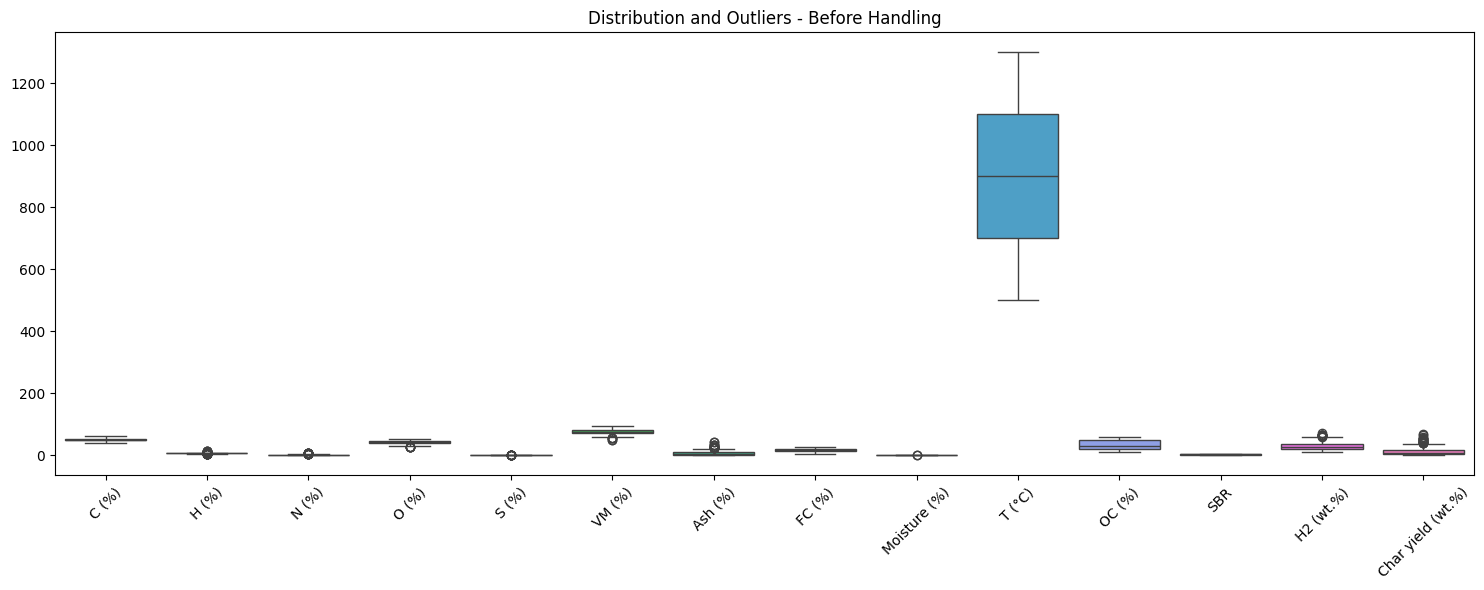


Outliers in C (%):
Number of outliers: 0
Lower bound: 39.852564129719084
Upper bound: 60.64314021438953

Outliers in H (%):
Number of outliers: 41
Lower bound: 5.348028299899357
Upper bound: 7.080685782491325

Outliers in N (%):
Number of outliers: 19
Lower bound: -1.1930261163309617
Upper bound: 3.307556495715985

Outliers in O (%):
Number of outliers: 6
Lower bound: 30.080034178395216
Upper bound: 54.843215402376906

Outliers in S (%):
Number of outliers: 13
Lower bound: -0.46505073280720666
Upper bound: 0.7750845546786778

Outliers in VM (%):
Number of outliers: 6
Lower bound: 56.69559763030258
Upper bound: 95.12380791174422

Outliers in Ash (%):
Number of outliers: 17
Lower bound: -10.362222372271425
Upper bound: 22.250663102126218

Outliers in FC (%):
Number of outliers: 0
Lower bound: 1.6604167263763028
Upper bound: 32.4394256398499

Outliers in Moisture (%):
Number of outliers: 2
Lower bound: 0.0
Upper bound: 0.0

Outliers in T (°C):
Number of outliers: 0
Lower bound: 100.0
Upp

In [10]:
# Function to identify outliers using IQR method
def identify_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers_mask = (df[column] < lower_bound) | (df[column] > upper_bound)
    outliers = df[outliers_mask][column]

    print(f"\nOutliers in {column}:")
    print(f"Number of outliers: {len(outliers)}")
    print(f"Lower bound: {lower_bound}")
    print(f"Upper bound: {upper_bound}")
    return outliers_mask

# Select columns 4 through 15
output_columns = df.iloc[:, :].columns

# Create box plots to visualize outliers before handling
plt.figure(figsize=(15, 6))
sns.boxplot(data=df[output_columns])
plt.xticks(rotation=45)
plt.title('Distribution and Outliers - Before Handling')
plt.tight_layout()
plt.show()

# Dictionary to store outlier masks for each column
outlier_masks = {}

# Identify outliers for each output column
for column in output_columns:
    outlier_masks[column] = identify_outliers(df_cleaned, column)

Becuase in H there are 60 out of 240 rows that are outliers, it is fine to delete those rows because there is still a significant amount of data remaining




Original dataset shape: (236, 14)
Shape after removing outliers: (167, 14)


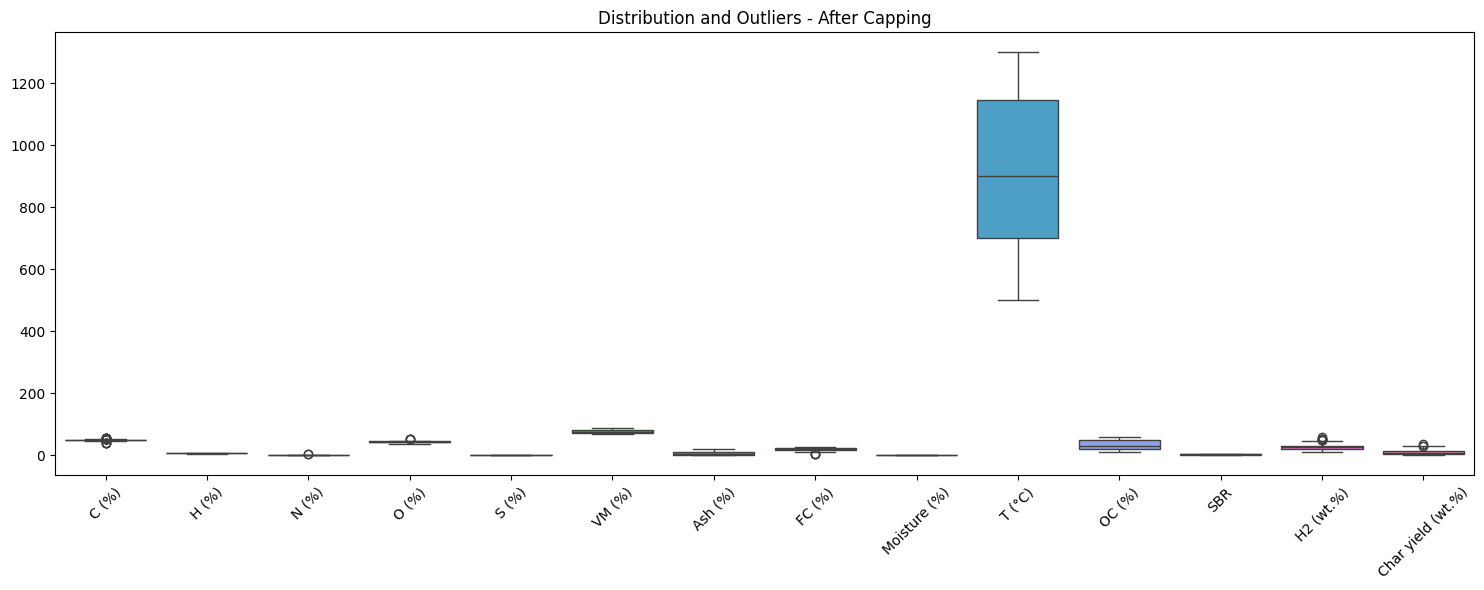

In [11]:
# Dealing with the outliers

# 1. Remove rows with outliers (might remove too much data)
df_removed = df_cleaned.copy()
combined_mask = pd.Series(False, index=df.index)
for mask in outlier_masks.values():
    combined_mask = combined_mask | mask
df_removed = df_removed[~combined_mask]

print(f"\nOriginal dataset shape: {df.shape}")
print(f"Shape after removing outliers: {df_removed.shape}")

# # 2. Cap the outliers at the bounds (Winsorization)
# df_capped = df.copy()
# for column in output_columns:
#     Q1 = df[column].quantile(0.25)
#     Q3 = df[column].quantile(0.75)
#     IQR = Q3 - Q1
#     lower_bound = Q1 - 1.5 * IQR
#     upper_bound = Q3 + 1.5 * IQR

#     df_capped[column] = df_capped[column].clip(lower=lower_bound, upper=upper_bound)

# # 3. Replace outliers with median
# df_median = df.copy()
# for column in output_columns:
#     median_val = df[column].median()
#     mask = outlier_masks[column]
#     df_median.loc[mask, column] = median_val

# Visualize the results after capping (you can change this to df_removed or df_median to see other methods)
plt.figure(figsize=(15, 6))
sns.boxplot(data=df_removed[output_columns])
plt.xticks(rotation=45)
plt.title('Distribution and Outliers - After Capping')
plt.tight_layout()
plt.show()

# Save the processed datasets
# df_capped.to_excel('data_outliers_capped.xlsx', index=False)
# df_median.to_excel('data_outliers_median.xlsx', index=False)
df_removed.to_excel('data_outliers_removed.xlsx', index=False)

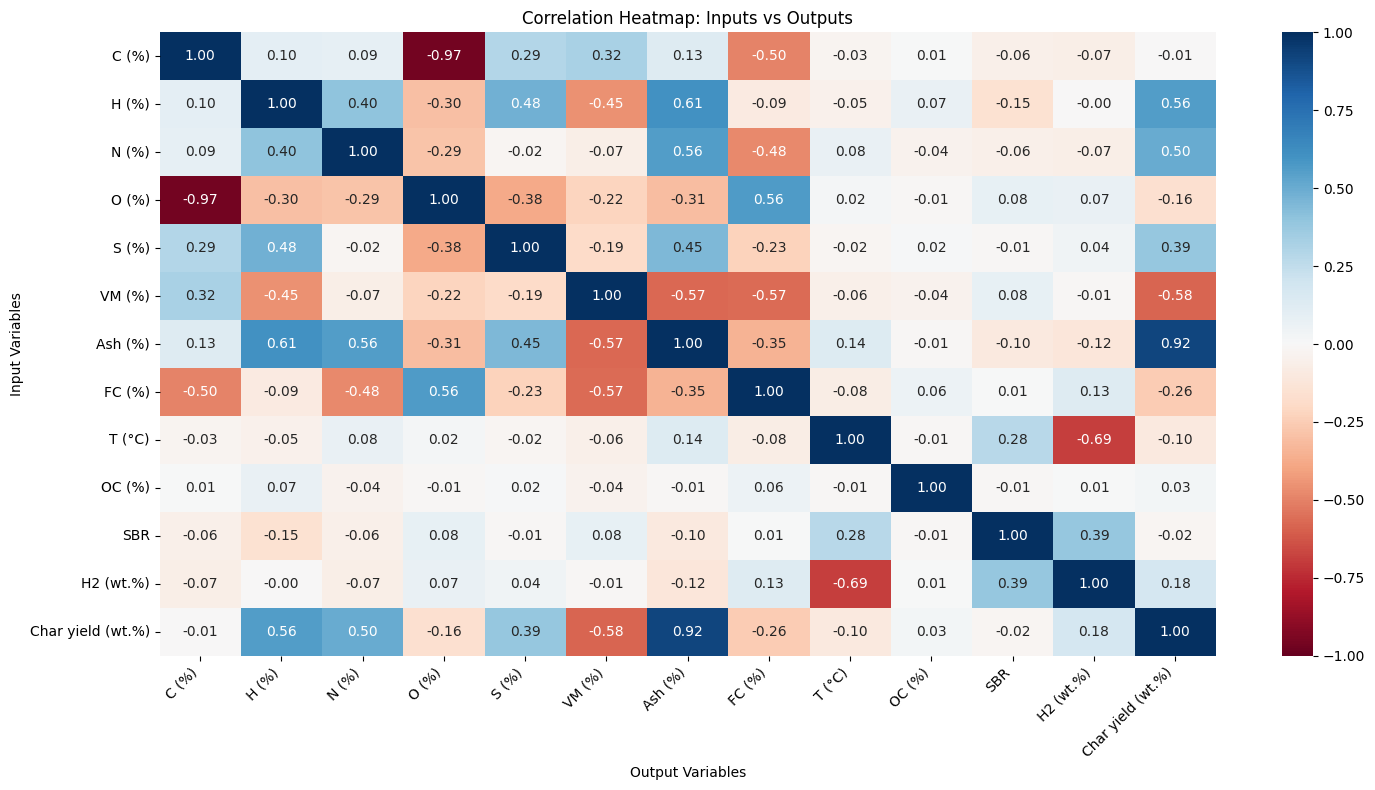

In [21]:
# creating a heat map of the cleaned data
# Read the Excel file
df = pd.read_excel('data_outliers_removed.xlsx')

# Define input and output columns
input_columns = ['C (%)', 'H (%)', 'N (%)', 'O (%)', 'S (%)', 'VM (%)',
                 'Ash (%)', 'FC (%)',
                 'T (°C)', 'OC (%)', 'SBR',
                 'H2 (wt.%)', 'Char yield (wt.%)']
output_columns = ['C (%)', 'H (%)', 'N (%)', 'O (%)', 'S (%)', 'VM (%)',
                 'Ash (%)', 'FC (%)',
                 'T (°C)', 'OC (%)', 'SBR',
                 'H2 (wt.%)', 'Char yield (wt.%)']

# Calculate correlations between inputs and outputs
correlation_matrix = np.zeros((len(input_columns), len(output_columns)))
for i, input_col in enumerate(input_columns):
    for j, output_col in enumerate(output_columns):
        correlation_matrix[i, j] = df[input_col].corr(df[output_col])

# Convert to DataFrame for better visualization
correlation_df = pd.DataFrame(correlation_matrix,
                            index=input_columns,
                            columns=output_columns)

# Create the heatmap
plt.figure(figsize=(15, 8))
sns.heatmap(correlation_df,
            annot=True,  # Show correlation values
            cmap='RdBu',  # Red-Blue colormap
            center=0,     # Center the colormap at 0
            vmin=-1,     # Minimum correlation value
            vmax=1,      # Maximum correlation value
            fmt='.2f')   # Format correlation values to 2 decimal places

plt.title('Correlation Heatmap: Inputs vs Outputs')
plt.xlabel('Output Variables')
plt.ylabel('Input Variables')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Show the plot
plt.show()

In [23]:
# Read the Cleaned Excel file for machine learning
data = pd.read_excel('data_outliers_removed.xlsx')

# the input variables are everything but the last two columns
X = data[data.columns[:-2]]

# the target are the final two columns
y = data[data.columns[-2:]]

# # Select only numerical columns (excluding 'object' type)
# X = X.select_dtypes(exclude=['object'])

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize models
models = {
    'Random Forest': RandomForestRegressor(),
    'Decision Tree': DecisionTreeRegressor(),
    'XGBoost': XGBRegressor(),
    'Linear Regression': LinearRegression()

}

# Train and evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    print(f"{name} Mean Squared Error: {mse:.3f}, R² Score: {r2:.3f}, MAE: {mae:.3f}")
    print(' ')


Random Forest Mean Squared Error: 10.470, R² Score: 0.881, MAE: 2.223
 
Decision Tree Mean Squared Error: 27.068, R² Score: 0.704, MAE: 2.919
 
XGBoost Mean Squared Error: 4.019, R² Score: 0.950, MAE: 1.423
 
Linear Regression Mean Squared Error: 8.680, R² Score: 0.899, MAE: 2.272
 


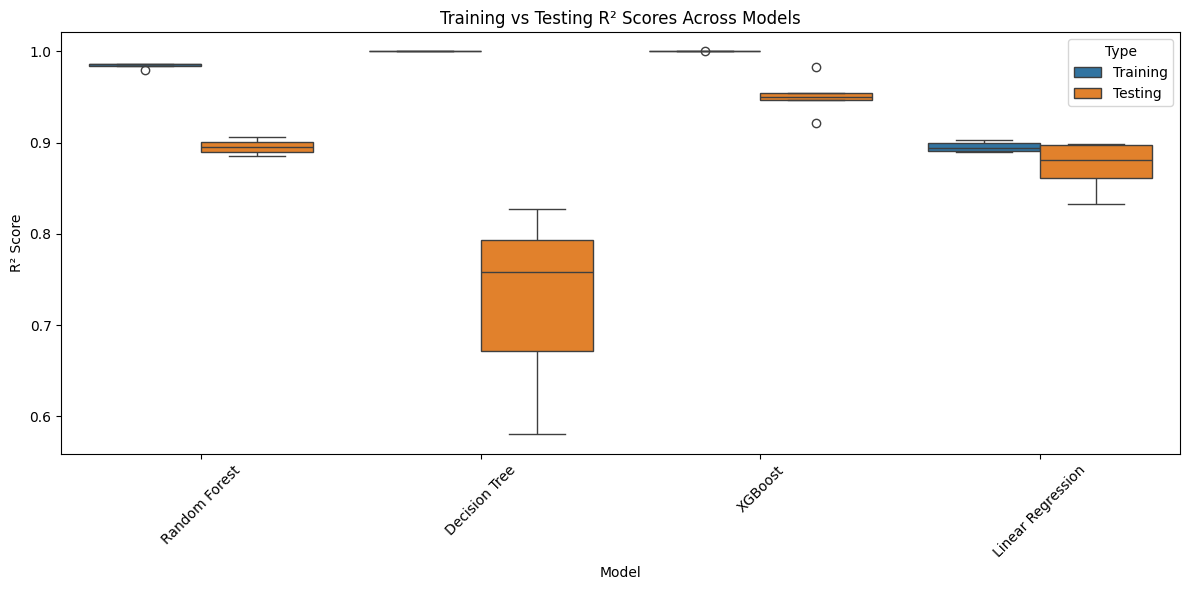


Mean R² Scores:

Random Forest:
Training R² (mean): 0.984
Testing R² (mean): 0.895

Decision Tree:
Training R² (mean): 1.000
Testing R² (mean): 0.726

XGBoost:
Training R² (mean): 1.000
Testing R² (mean): 0.951

Linear Regression:
Training R² (mean): 0.895
Testing R² (mean): 0.874


In [29]:
# Initialize models
models = {
    'Random Forest': RandomForestRegressor(random_state=42),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'XGBoost': XGBRegressor(random_state=42),
    'Linear Regression': LinearRegression()
}

# Initialize lists to store R² scores
train_scores = []
test_scores = []
model_names = []

# Perform k-fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

for name, model in models.items():
    train_r2_scores = []
    test_r2_scores = []

    for train_idx, test_idx in kf.split(X):
        # Split data
        X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
        y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

        # Fit model
        model.fit(X_train, y_train)

        # Get predictions
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)

        # Calculate R² scores
        train_r2 = r2_score(y_train, y_train_pred)
        test_r2 = r2_score(y_test, y_test_pred)

        train_r2_scores.append(train_r2)
        test_r2_scores.append(test_r2)

    # Store scores
    train_scores.extend(train_r2_scores)
    test_scores.extend(test_r2_scores)
    model_names.extend([name] * len(train_r2_scores))

# Create DataFrame for plotting
plot_data = pd.DataFrame({
    'Model': model_names * 2,
    'R² Score': train_scores + test_scores,
    'Type': ['Training'] * len(train_scores) + ['Testing'] * len(test_scores)
})

# Create boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(data=plot_data, x='Model', y='R² Score', hue='Type')
plt.xticks(rotation=45)
plt.title('Training vs Testing R² Scores Across Models')
plt.tight_layout()
plt.show()

# Print mean scores
print("\nMean R² Scores:")
for name in models.keys():
    train_mask = (plot_data['Model'] == name) & (plot_data['Type'] == 'Training')
    test_mask = (plot_data['Model'] == name) & (plot_data['Type'] == 'Testing')

    mean_train = plot_data[train_mask]['R² Score'].mean()
    mean_test = plot_data[test_mask]['R² Score'].mean()

    print(f"\n{name}:")
    print(f"Training R² (mean): {mean_train:.3f}")
    print(f"Testing R² (mean): {mean_test:.3f}")

The best model for this data set is XGBoost because the test and training R2 are the highest.

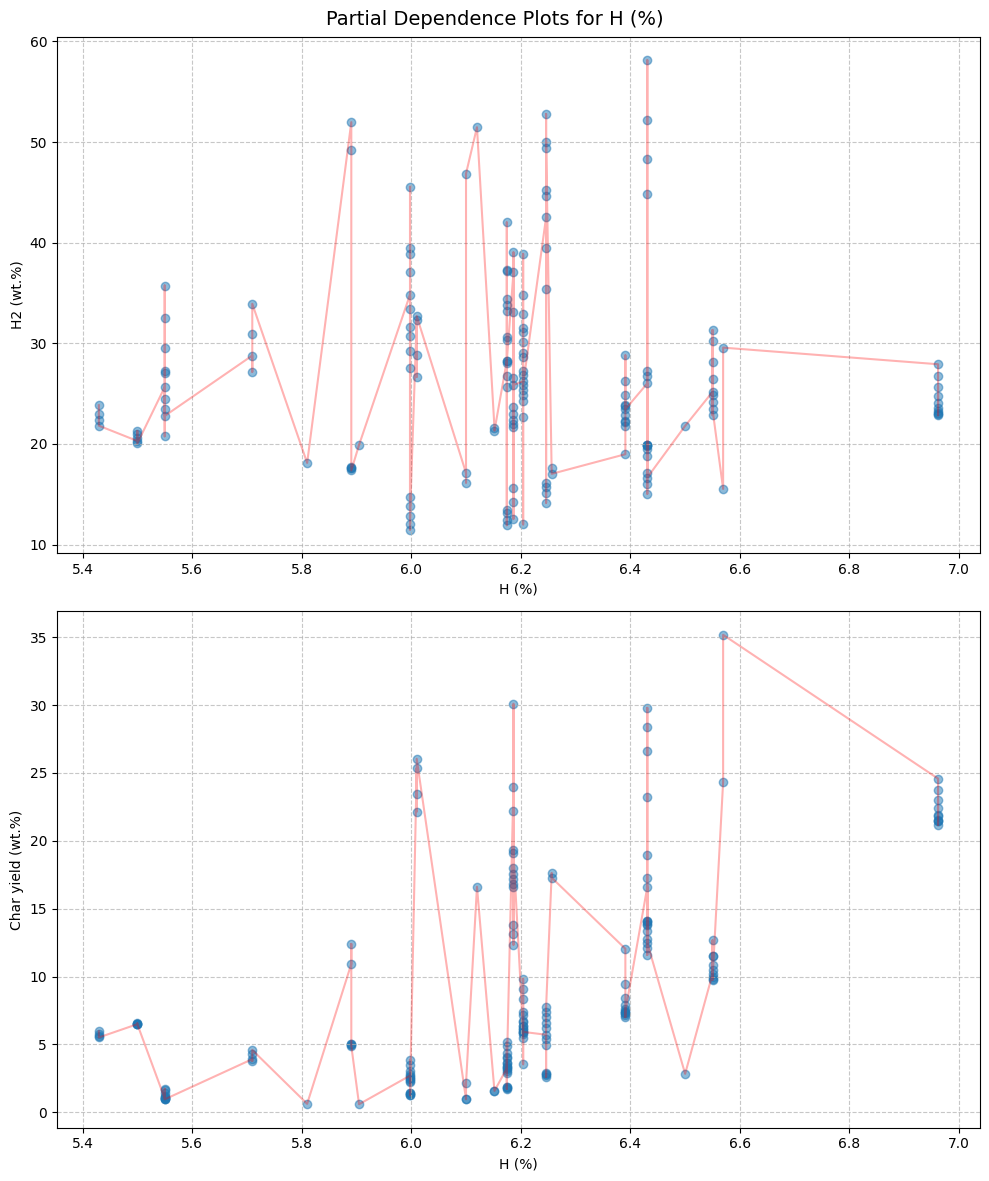

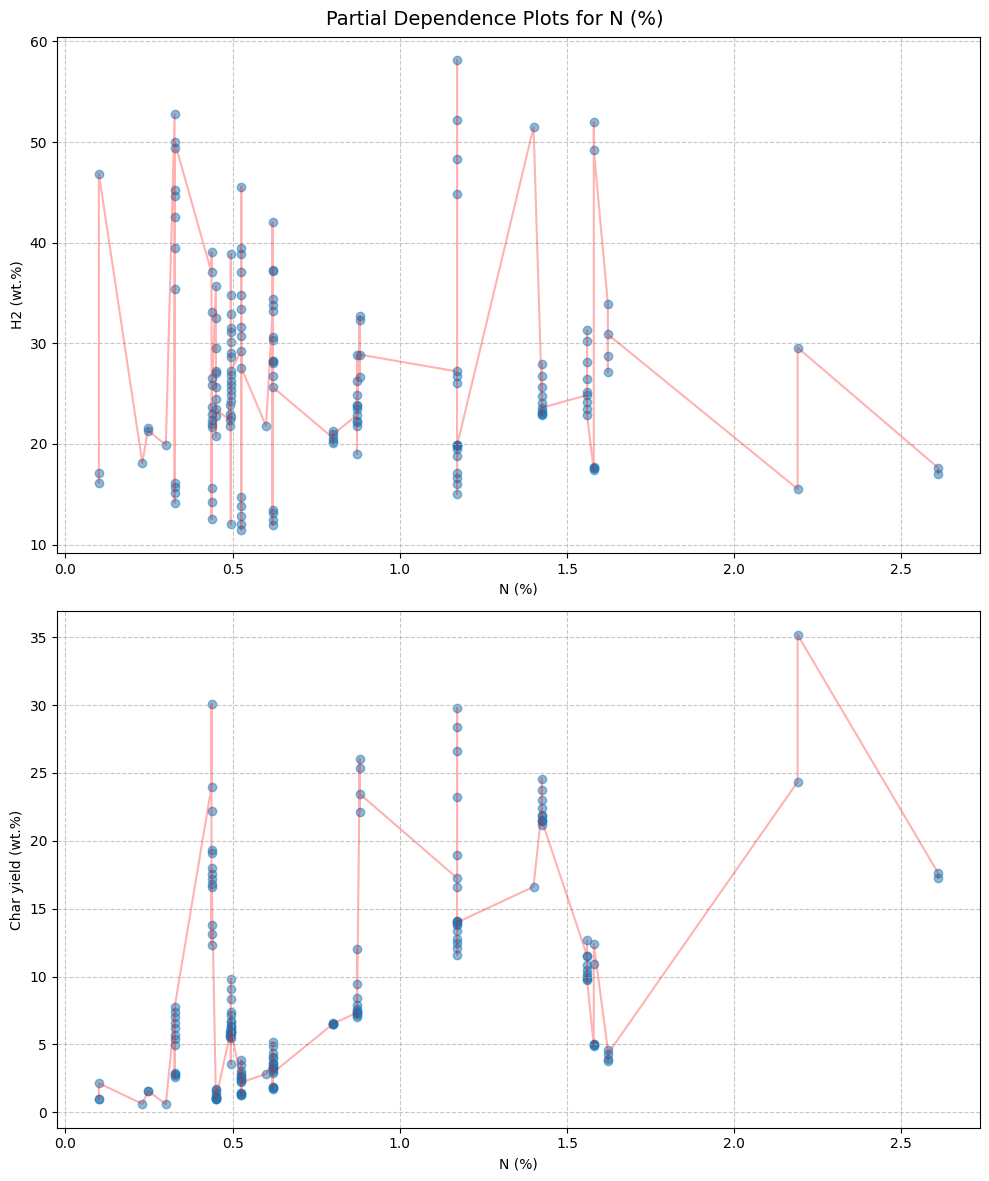

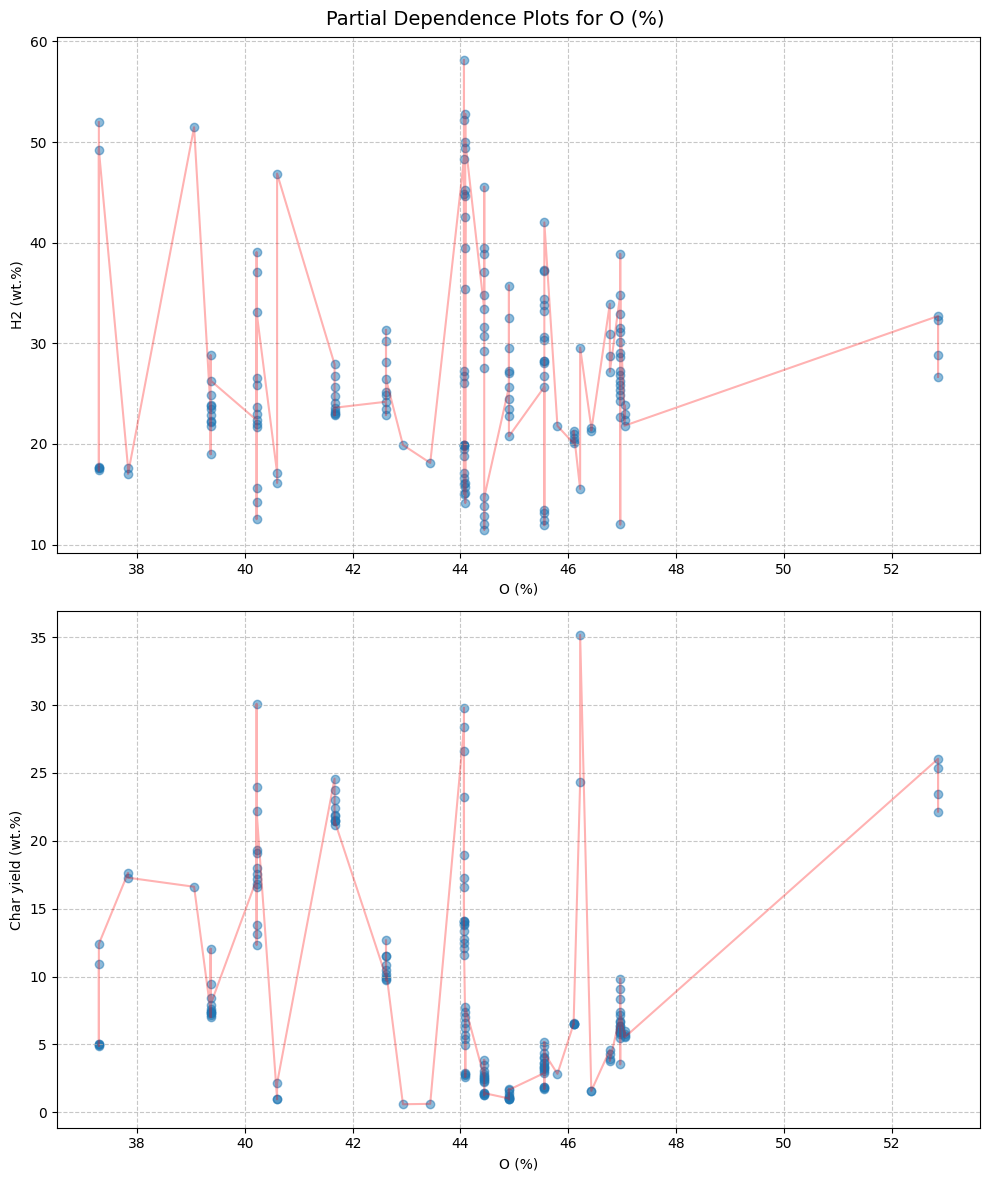

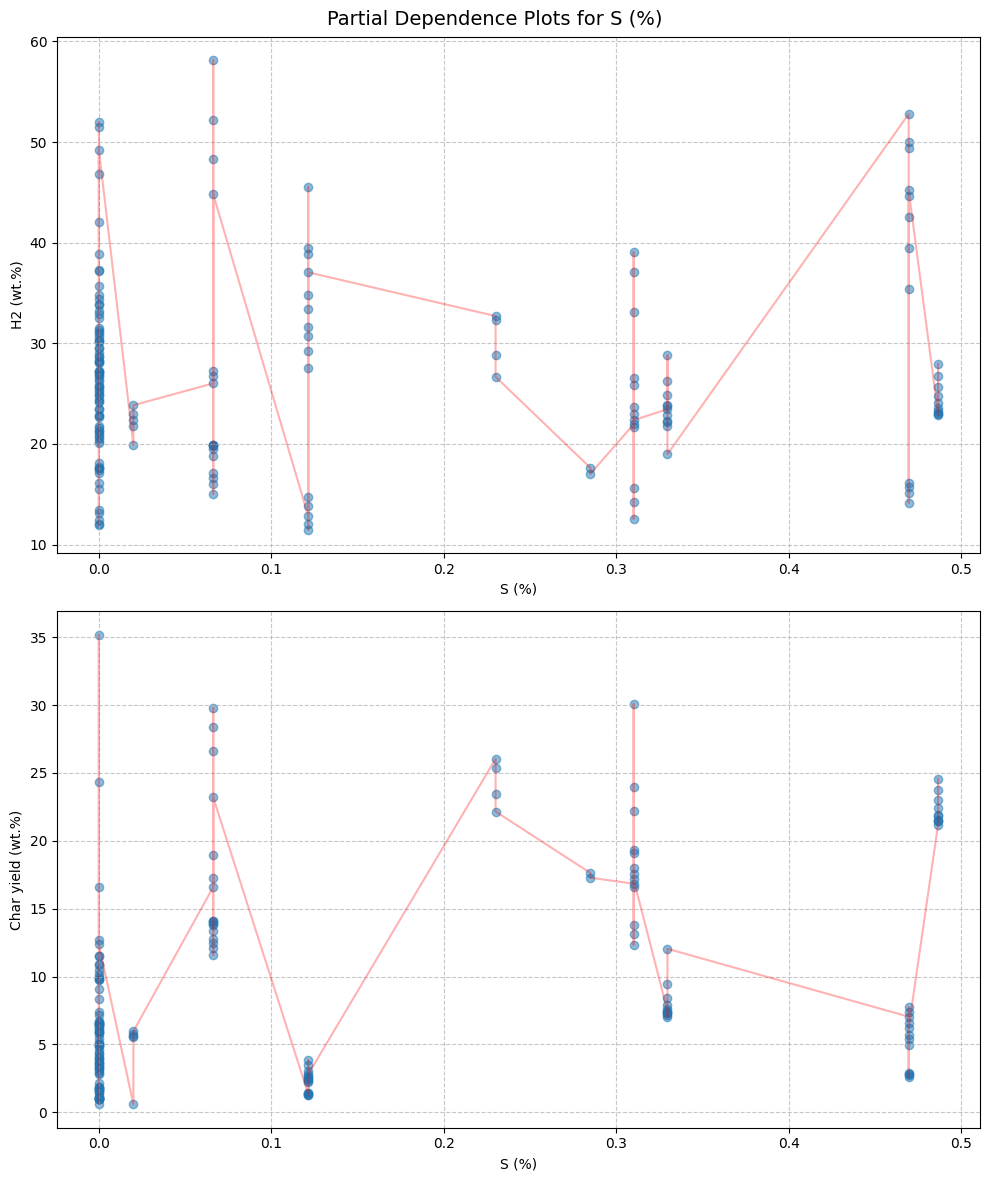

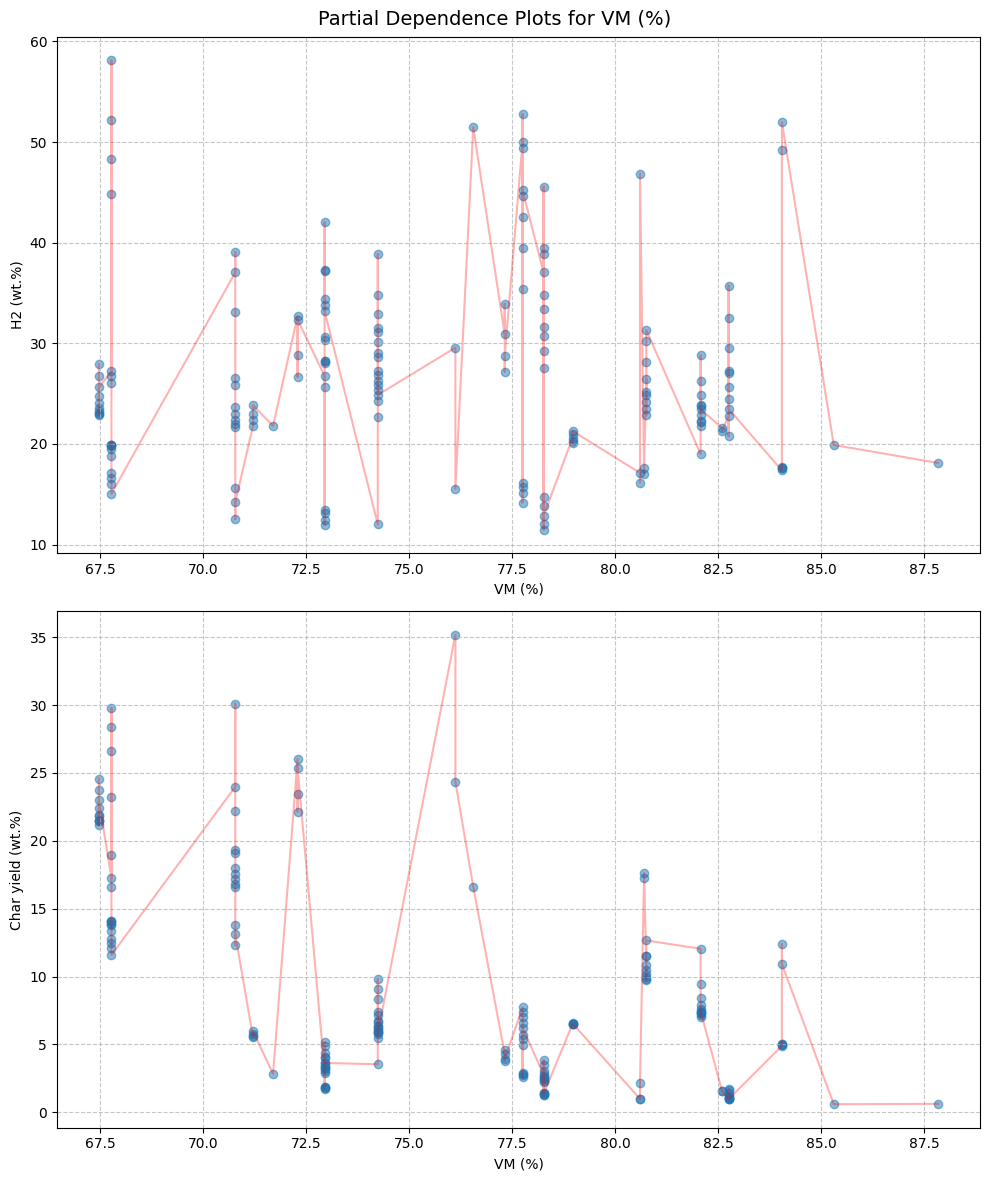

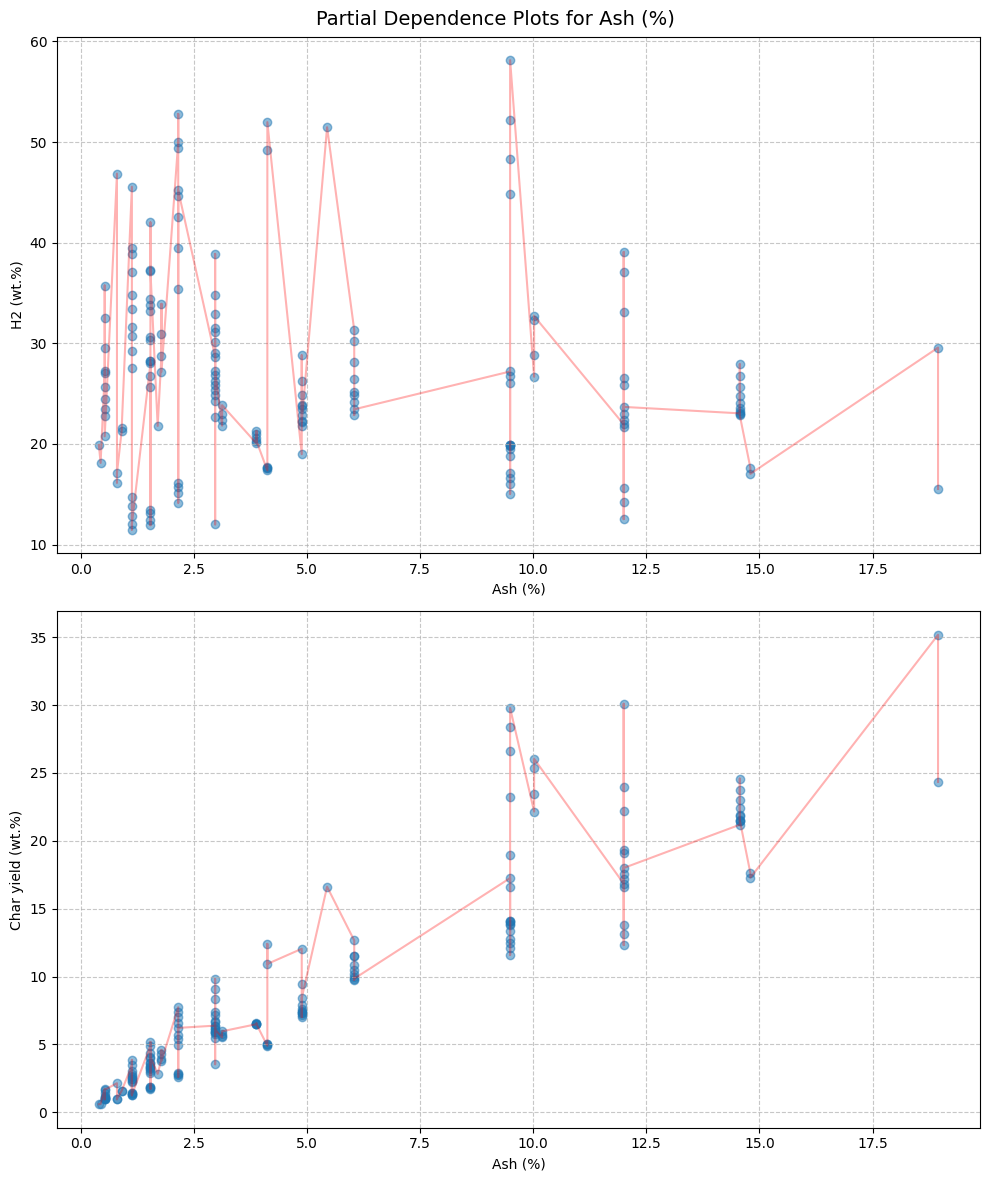

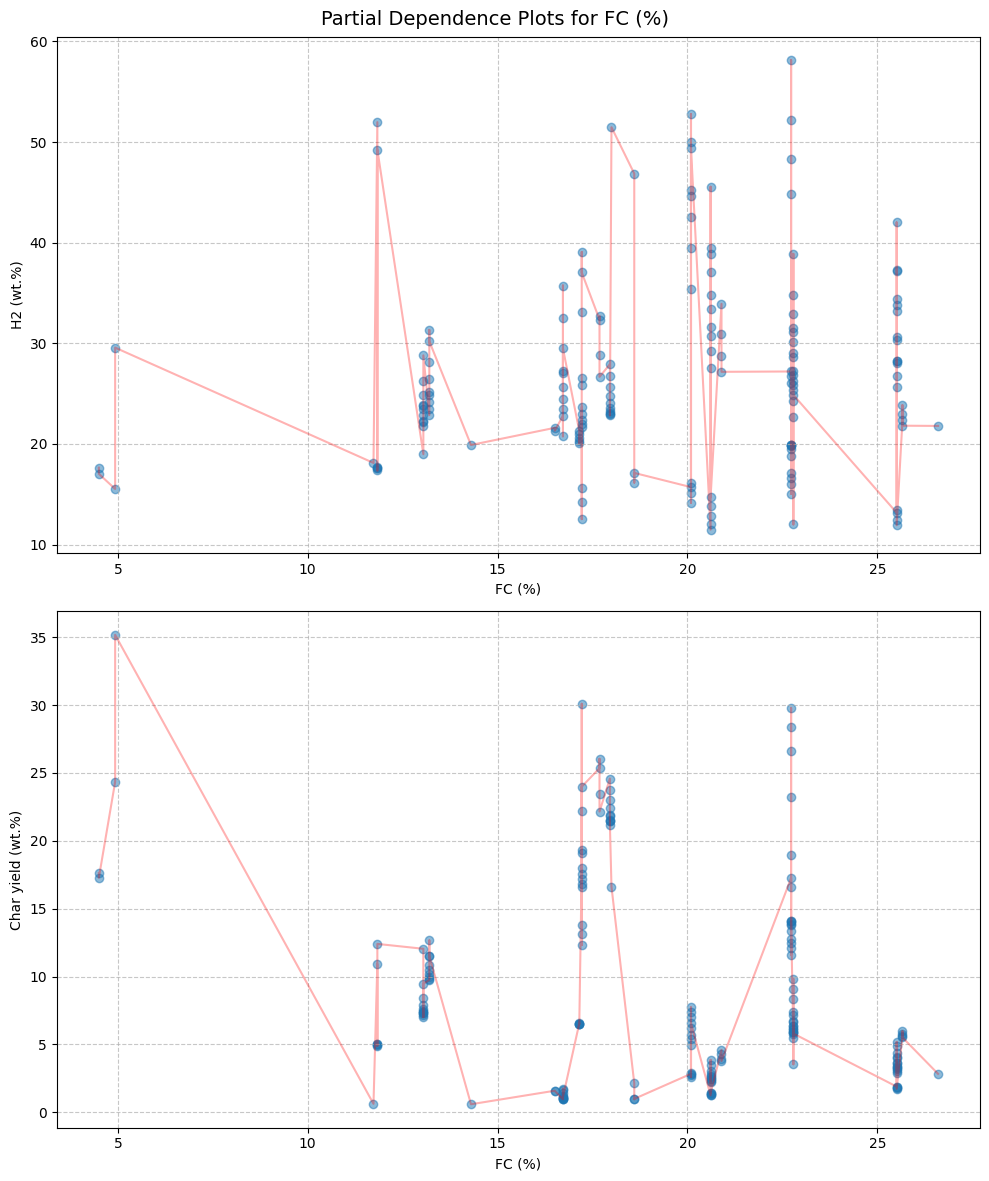

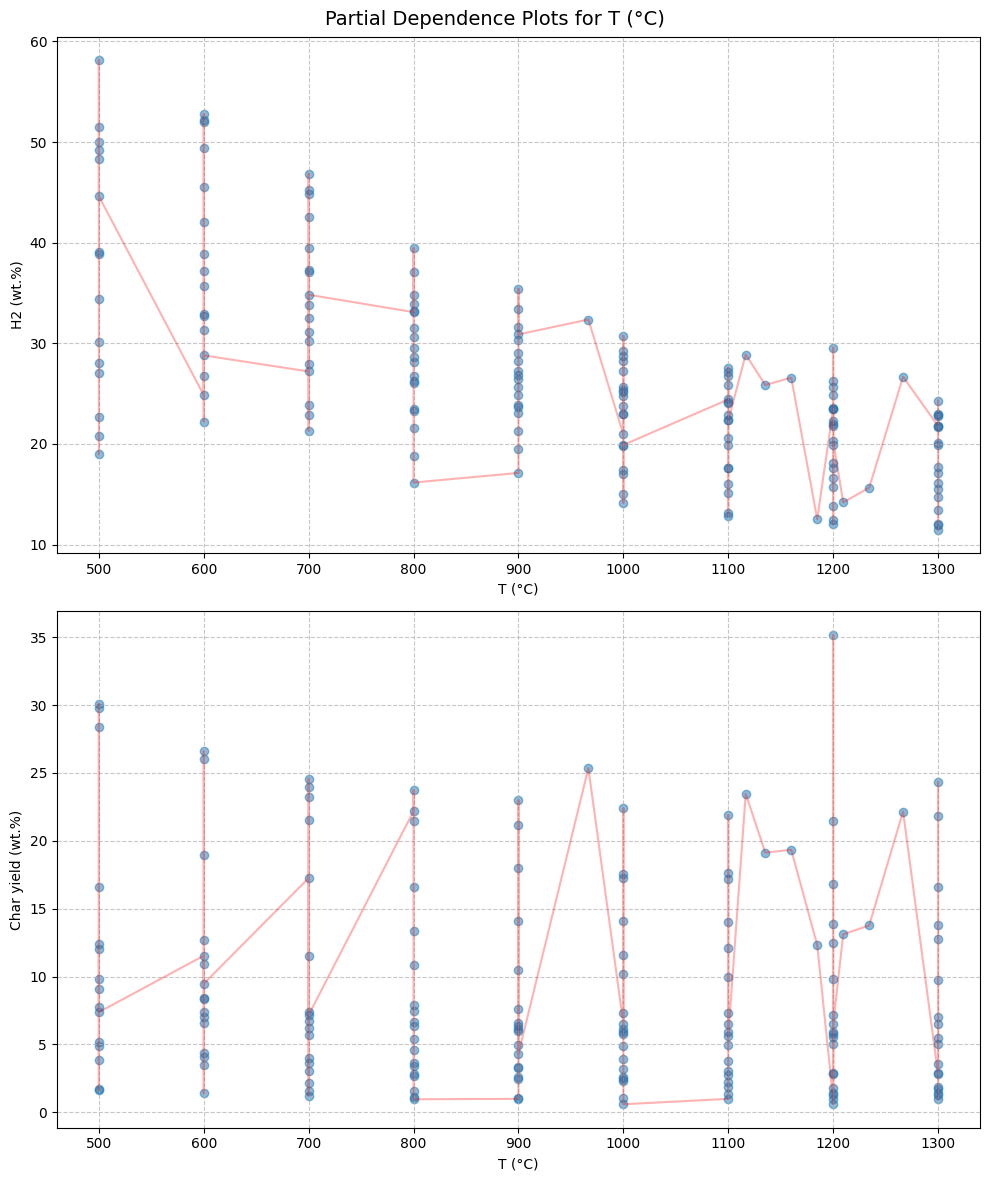

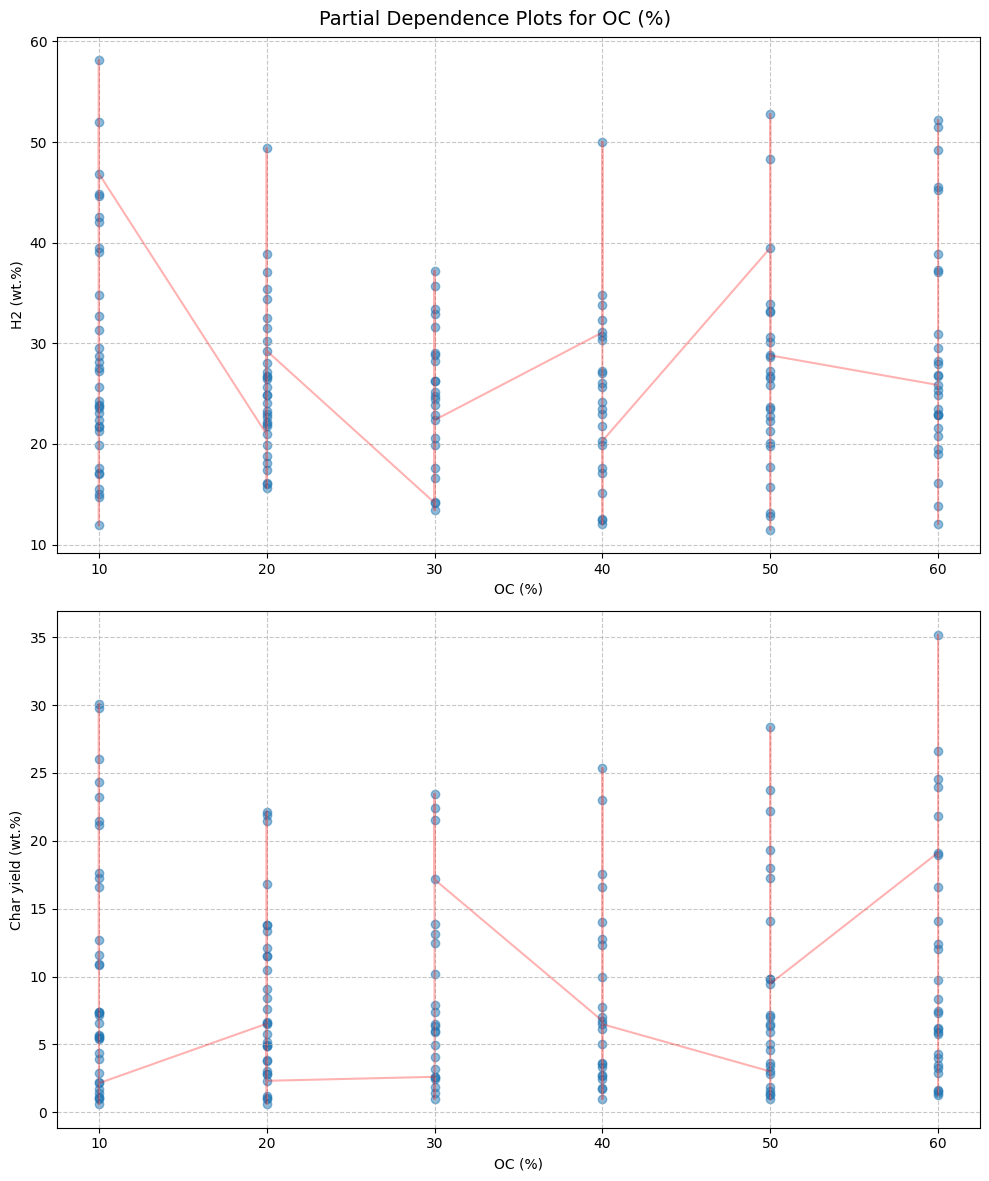

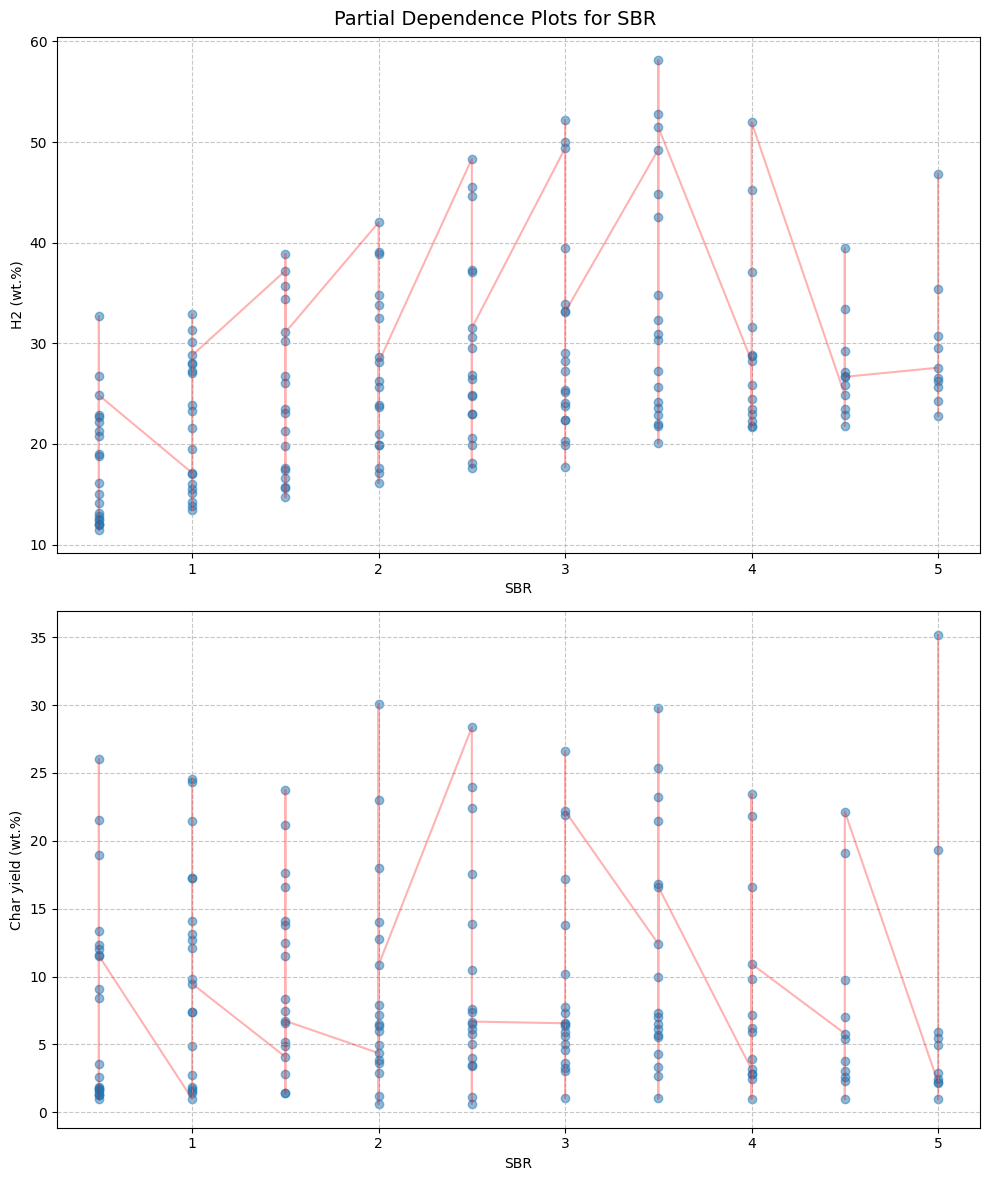

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def create_pdp_plots(data, feature, outputs=['H2 (wt.%)', 'Char yield (wt.%)']):
    """
    Create Partial Dependence Plots for a given feature.

    Parameters:
    -----------
    data : pandas.DataFrame
        Input data containing features and target variables
    feature : str
        Name of the feature to analyze
    outputs : list
        List of output variable names to analyze
    """
    fig, axes = plt.subplots(len(outputs), 1, figsize=(10, 12))
    fig.suptitle(f'Partial Dependence Plots for {feature}', fontsize=14)

    for i, output in enumerate(outputs):
        # Sort data by feature value
        sorted_data = data.sort_values(by=feature)

        # Create the PDP plot
        axes[i].scatter(sorted_data[feature], sorted_data[output], alpha=0.5)
        axes[i].plot(sorted_data[feature], sorted_data[output], 'r-', alpha=0.3)

        # Add labels and title
        axes[i].set_xlabel(feature)
        axes[i].set_ylabel(output)
        axes[i].grid(True, linestyle='--', alpha=0.7)

    plt.tight_layout()
    plt.show()

# Read the Excel file
df = pd.read_excel('data_outliers_removed.xlsx')

# List of input features
features = ['H (%)', 'N (%)', 'O (%)', 'S (%)', 'VM (%)',
           'Ash (%)', 'FC (%)', 'T (°C)', 'OC (%)', 'SBR']

# Create PDP plots for each feature
for feature in features:
    create_pdp_plots(df, feature)